In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
working_folder='/content/drive/MyDrive/TransformersCode/05-Service_Center/'

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.1 MB/s eta 0:00:00


In [4]:
from datasets import *

In [5]:
train_ds = load_from_disk(working_folder  + 'train_dataset')
test_ds = load_from_disk(working_folder +'test_dataset')
val_ds = load_from_disk(working_folder +'val_dataset')

In [6]:
train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 6104
})

In [7]:
model_id='google/vit-base-patch16-224-in21k'

In [8]:
from transformers import ViTImageProcessor

In [9]:
processor = ViTImageProcessor.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [10]:
image=train_ds[0]['img']

type(image)

list

In [11]:
import numpy as np

image_np=np.array(image, dtype=np.uint8)
image_np.shape

(48, 48, 3)

array([[[ 51,  51,  51],
        [ 49,  49,  49],
        [ 47,  47,  47],
        ...,
        [ 37,  37,  37],
        [ 38,  38,  38],
        [ 48,  48,  48]],

       [[ 49,  49,  49],
        [ 48,  48,  48],
        [ 49,  49,  49],
        ...,
        [ 37,  37,  37],
        [ 43,  43,  43],
        [ 55,  55,  55]],

       [[ 50,  50,  50],
        [ 51,  51,  51],
        [ 48,  48,  48],
        ...,
        [ 39,  39,  39],
        [ 49,  49,  49],
        [ 58,  58,  58]],

       ...,

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 38,  38,  38]],

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 40,  40,  40],
        ...,
        [ 41,  41,  41],
        [ 35,  35,  35],
        [ 35,  35,  35]],

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [128, 128, 128],
        [ 54,  54,  54],
        [ 71,  71,  71]]], dtype=uint8)
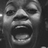

In [12]:
image_np

In [13]:
image_np_rgb=np.moveaxis(image_np, source=-1, destination=0)
image_np_rgb.shape

(3, 48, 48)

In [14]:
processor_output=processor(image_np_rgb)
processor_output

{'pixel_values': [array([[[-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        [-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        [-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        ...,
        [-0.70980394, -0.70980394, -0.70980394, ..., -0.4588235 ,
         -0.45098037, -0.45098037],
        [-0.70980394, -0.70980394, -0.70980394, ..., -0.45098037,
         -0.44313723, -0.44313723],
        [-0.70980394, -0.70980394, -0.70980394, ..., -0.45098037,
         -0.44313723, -0.44313723]],

       [[-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        [-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        [-0.6       , -0.6       , -0.6       , ..., -0.62352943,
         -0.62352943, -0.62352943],
        ...,
        [-0.70980394, -0.70980394, -

In [15]:
processor_output_np = np.array(processor_output['pixel_values'])
processor_output_np.shape

(1, 3, 224, 224)

In [16]:
def preprocess_images(dataset):

    images = dataset['img']

    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image in images]

    processor_output = processor(images=images)

    dataset['pixel_values'] = processor_output['pixel_values']

    return dataset

In [17]:
classes_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

In [18]:
features = Features({
    'label': ClassLabel(names=classes_names),
    'img': Array3D(dtype="int64", shape=(3,48,48)),
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
})

preprocessed_train_ds = train_ds.map(preprocess_images, batched=True,  features=features)

preprocessed_val_ds = val_ds.map(preprocess_images, batched=True, features=features)

preprocessed_test_ds = test_ds.map(preprocess_images, batched=True, features=features)

Map:   0%|          | 0/6104 [00:00<?, ? examples/s]

Map:   0%|          | 0/784 [00:00<?, ? examples/s]

Map:   0%|          | 0/770 [00:00<?, ? examples/s]

In [19]:
preprocessed_train_ds

Dataset({
    features: ['label', 'img', 'pixel_values'],
    num_rows: 6104
})

In [20]:
from matplotlib import pyplot as plt

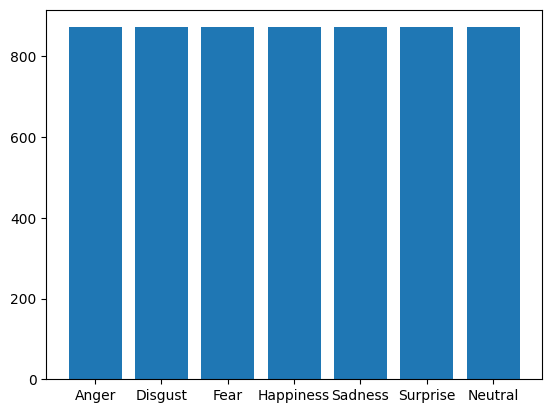

In [21]:
keys, counts = np.unique(preprocessed_train_ds["label"], return_counts=True)
plt.bar(classes_names, counts)
plt.show()

In [22]:
preprocessed_train_ds.save_to_disk(working_folder  + 'preprocessed_train_dataset')
preprocessed_test_ds.save_to_disk(working_folder +'preprocessed_test_dataset')
preprocessed_val_ds.save_to_disk(working_folder + 'preprocessed_val_dataset')

Saving the dataset (0/9 shards):   0%|          | 0/6104 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/770 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/784 [00:00<?, ? examples/s]